In [8]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
dataset = pd.read_csv("../../creditcard.csv")
print(dataset)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.01830

In [9]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [10]:
from neupy import algorithms, utils, init
from datetime import datetime

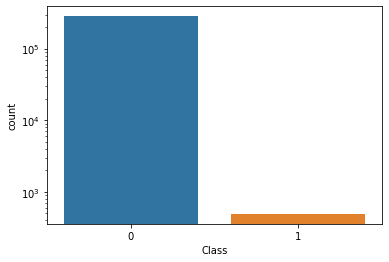

In [11]:
import seaborn as sn
ax=sn.countplot(x='Class',data=dataset);
ax.set_yscale('log')

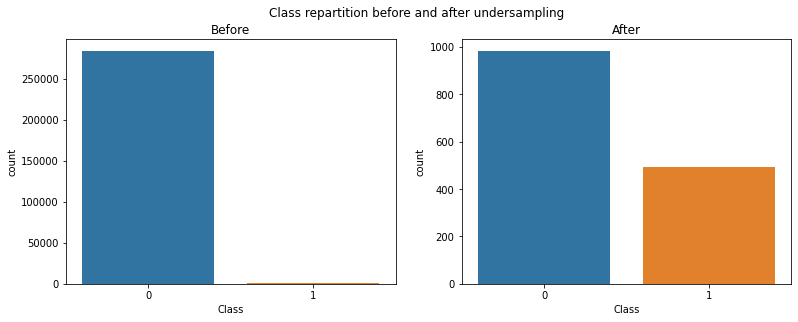

In [12]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler 

undersample = RandomUnderSampler(sampling_strategy=0.5)

cols = dataset.columns.tolist()
cols = [c for c in cols if c not in ["Class"]]
target = "Class"

#define X and Y
X = dataset[cols]
Y = dataset[target]

#undersample
X_under, Y_under = undersample.fit_resample(X, Y)
test = pd.DataFrame(Y_under, columns = ['Class'])

fig, axs = plt.subplots(ncols=2, figsize=(13,4.5))
sn.countplot(x="Class", data=dataset, ax=axs[0])
sn.countplot(x="Class", data=test, ax=axs[1])

fig.suptitle("Class repartition before and after undersampling")
a1=fig.axes[0]
a1.set_title("Before")
a2=fig.axes[1]
a2.set_title("After")

dataset = pd.concat([X_under, Y_under], axis=1)

In [13]:
from pandas import DataFrame

# Data preprocessing
train_size = 0.75
test_size = 1 - train_size
train, test = train_test_split(dataset, test_size = test_size)
patterns_input = train.iloc[:,1:30].values[:]
input_test = test.iloc[:,1:30].values[:]

patterns_target = train.iloc[:,-1].values[:]
target_test = test['Class'].values[:]

input_train, input_valid, target_train, target_valid = train_test_split(
    patterns_input, patterns_target, train_size=train_size, test_size=test_size,
    random_state=0, shuffle=True)

print(input_train.shape, target_train.shape)
print(input_valid.shape, target_valid.shape)

(830, 29) (830,)
(277, 29) (277,)
